In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss

pd.set_option("display.max_columns", None)

## About dataset

This dataset is about past loans. The **SBAnational.csv** data set includes details of 899164 customers whose loan are already paid in full or defaulted. It includes following fields:

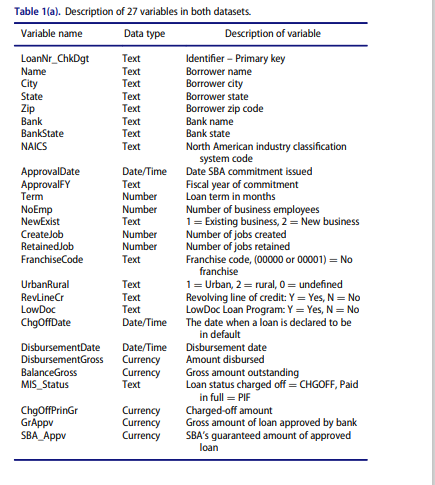

## LOAD THE DATASET

In [2]:
datas = pd.read_csv("SBAnational.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
datas.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


## EXPLORING THE DATASET

In [4]:
datas.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [5]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [6]:
datas.describe(include="all")

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
count,8.991640e+05,899150,899134,899150,899164.000000,897605,897598,899164.000000,899164,899164.0,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000,894636,896582,162699,896796,899164,899164,897167,899164,899164,899164
unique,NaN,779583,32581,51,NaN,5802,56,NaN,9859,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,8,6448,8472,118859,15,2,83165,22128,38326
top,NaN,SUBWAY,LOS ANGELES,CA,NaN,BANK OF AMERICA NATL ASSOC,CA,NaN,7-Jul-93,2006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,13-Mar-10,31-Jul-95,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$25,000.00"
freq,NaN,1269,11558,130619,NaN,86853,118116,NaN,1131,76040.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,420288,782822,734,10371,43787,899150,739609,737152,69394,49579
mean,4.772612e+09,NaN,NaN,NaN,53804.391241,NaN,NaN,398660.950146,NaN,NaN,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.538175e+09,NaN,NaN,NaN,31184.159152,NaN,NaN,263318.312759,NaN,NaN,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000014e+09,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.589758e+09,NaN,NaN,NaN,27587.000000,NaN,NaN,235210.000000,NaN,NaN,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.361439e+09,NaN,NaN,NaN,55410.000000,NaN,NaN,445310.000000,NaN,NaN,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.904627e+09,NaN,NaN,NaN,83704.000000,NaN,NaN,561730.000000,NaN,NaN,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## CHECKING THE NUMBER OF MISSING VALUES FOR EACH ATTRIBUTE

In [7]:
datas.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

## REMOVING THE DUPLICATES IF THERE ARE ANY

In [8]:
datas.drop_duplicates(subset="LoanNr_ChkDgt", inplace=True)

## CHECKING THE NUMBER OF UNIQUE VALUES FOR EACH ATTRIBUTE

In [9]:
datas.nunique()

LoanNr_ChkDgt        899164
Name                 779583
City                  32581
State                    51
Zip                   33611
Bank                   5802
BankState                56
NAICS                  1312
ApprovalDate           9859
ApprovalFY               70
Term                    412
NoEmp                   599
NewExist                  3
CreateJob               246
RetainedJob             358
FranchiseCode          2768
UrbanRural                3
RevLineCr                18
LowDoc                    8
ChgOffDate             6448
DisbursementDate       8472
DisbursementGross    118859
BalanceGross             15
MIS_Status                2
ChgOffPrinGr          83165
GrAppv                22128
SBA_Appv              38326
dtype: int64

## HANDLING THE MISSING VALUES FOR STATE

In [10]:
datas.loc[datas.State.isna()]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
35517,1270833006,SO. JERSEY DANCE/MERRYLEES,PENNSVILLE,NaN,8070,NaN,NaN,0,28-Jul-81,1981,120,1,2.0,0,0,0,0,N,N,5-Mar-90,NaN,$0.00,$0.00,NaN,"$11,364.00","$15,000.00","$15,000.00"
49244,1380800010,TRYON COATS & LEATHER,JOHNSTOWN NY,NaN,0,KEYBANK NATIONAL ASSOCIATION,NY,0,18-May-66,1966,282,0,0.0,0,0,0,0,N,N,29-Mar-90,16-Aug-66,"$60,000.00",$0.00,CHGOFF,"$6,084.00","$60,000.00","$54,000.00"
264664,2850643009,CENTURY 21 PHILLIPS REALTY,CAMERON PARK,NaN,95682,SBA - EDF ENFORCEMENT ACTION,CO,0,12-Feb-87,1987,240,19,1.0,0,19,0,0,N,N,NaN,17-Jun-87,"$81,000.00",$0.00,P I F,$0.00,"$83,000.00","$83,000.00"
306274,3113583009,THE COMPUTER EDGE,"BOX 267, APO AP",NaN,96205,RTC/WESTPORT SAVINGS BANK,CA,541511,21-Jan-88,1988,73,8,1.0,0,0,0,0,N,N,18-Sep-93,16-Mar-88,"$50,000.00",$0.00,CHGOFF,"$30,589.00","$50,000.00","$45,000.00"
328526,3280213000,KING'S TRUCK WASH,WICHITA,NaN,67219,SOUTH CENT. KANSAS ECONOMIC DE,KS,811192,5-Aug-88,1988,120,17,2.0,10,7,0,0,N,N,NaN,12-Jul-89,"$119,000.00",$0.00,P I F,$0.00,"$119,000.00","$119,000.00"
351072,3445553007,JAMES A. NICHOLS,"1542,TABUK,SAUDI ARABIA",NaN,79925,WELLS FARGO BANK NATL ASSOC,TX,532230,19-May-89,1989,16,1,2.0,0,0,0,0,N,N,NaN,31-Jul-89,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$54,000.00"
366139,3556993002,"GOLF SHOES UNLIMITED, INC.",PALM BEACH GARDENS,NaN,33410,"BEAL BANK, SSB",TX,451110,19-Oct-89,1990,84,3,2.0,0,0,1,0,N,N,NaN,31-Jan-90,"$75,000.00",$0.00,P I F,$0.00,"$75,000.00","$67,500.00"
366158,3557093005,CASCO SERVICE,CASCO,NaN,54205,UNION STATE BANK,WI,0,19-Oct-89,1990,204,8,1.0,0,0,1,0,N,N,NaN,30-Apr-90,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$252,600.00"
367007,3563473008,P & P TOOL INC,SOMERSET,NaN,54025,FIRST BANK OF BALDWIN,WI,0,26-Oct-89,1990,240,7,1.0,0,0,1,0,N,N,NaN,31-Jan-90,"$82,000.00",$0.00,P I F,$0.00,"$82,000.00","$73,800.00"
379174,3664443009,WILLIAMS JEWELERS,SALT LAKE CITY,NaN,84124,ZIONS FIRST NATIONAL BANK,UT,448310,14-Dec-89,1990,60,4,1.0,0,0,1,0,N,N,NaN,31-Jul-90,"$250,000.00",$0.00,P I F,$0.00,"$250,000.00","$212,500.00"


In [11]:
asdf = datas.loc[datas.Zip==33410].index.to_list()

In [12]:
asdf_67219 = datas.loc[datas.Zip==67219].index.to_list()

In [13]:
asdf_95682 = datas.loc[datas.Zip==95682].index.to_list()

In [14]:
datas.loc[204456,"Zip"]=55082


In [15]:
datas.loc[asdf,"City"]="PALM BEACH GARDENS"


In [16]:
datas.loc[asdf_67219,"City"]="WICHITA"


In [17]:
datas.loc[asdf_95682,"City"]="SHINGLE SPRINGS"


In [18]:
datas.loc[49244,"State"]="NY"


In [19]:
datas.loc[264664,["City","State"]]=["SHINGLE SPRINGS","CA"]


In [20]:
datas.loc[306274,["City","State"]]=["SHINGLE SPRINGS","CA"]


In [21]:
datas.loc[351072,["City","State"]]=["EL PASO","TX"]


In [22]:
datas.loc[328526,["City","State"]]=["WICHITA","KS"]


In [23]:
datas.loc[366139,["City","State"]]=["PALM BEACH GARDENS","FL"]


In [24]:
datas.loc[366158,["City","State"]]=["CASCO","WI"]


In [25]:
datas.loc[12353,["City","State"]]=["SOMERSET","WI"]


In [26]:
datas.loc[367007,["City","State"]]=["SOMERSET","WI"]


In [27]:
datas.loc[379174,["City","State"]]=["SALT LAKE CITY","UT"]


In [28]:
datas.loc[385418,["City","State"]]=["LAKE OZARK","MO"]


In [29]:
datas.loc[871847,["City","State"]]=["HASLET","TX"]


In [30]:
datas.loc[858470,"City"]="DALLAS"


In [31]:
datas.loc[869948,["City","State"]]=["DALLAS","TX"]

In [32]:
datas.loc[885335,["City","State"]]=["DALLAS","TX"]

In [33]:
datas.loc[35517,"State"]= "NJ"

In [34]:
datas.loc[datas.State.isna()]


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv


### STORING THE STATES OF CUSTOMERS TO A LIST

In [35]:
states = list(datas.State.unique())

## DROPPING COLUMNS POR ATTRIBUTES THAT ARE NOT RELEVANT
They Include
* LoanNr_ChkDgt
* Name 
*ChgOffDate
*BankState
*City
*Zip
*ApprovalDate
*Bank
*ApprovalFY
*DisbursementDate


In [36]:
# LIST OF ATTTRIBUTES TO DROP
columns_to_drop = ["LoanNr_ChkDgt","Name","ChgOffDate", "BankState", "City", "Zip", "ApprovalDate","Bank", "ApprovalFY","DisbursementDate"]

# DROPPING THE COLUMNS
datas.drop(columns_to_drop, axis="columns", inplace=True)

In [37]:
datas.head()

,State,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,IN,451120,84,4,2.0,0,0,1,0,N,Y,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,IN,722410,60,2,2.0,0,0,1,0,N,Y,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,IN,621210,180,7,1.0,0,0,1,0,N,N,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,OK,0,60,2,1.0,0,0,1,0,N,Y,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,FL,0,240,14,1.0,7,7,1,0,N,N,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


## HANDLING INVALID AND MISSING VALUES FOR REVOLVING LINE OF CREDIT

In [38]:
datas.RevLineCr.unique()

array(['N', '0', 'Y', 'T', nan, '`', ',', '1', 'C', '3', '2', 'R', '7',
       'A', '5', '.', '4', '-', 'Q'], dtype=object)

In [39]:
# REPLACING THE INVALID VALUES WITH AN EMPTY STRING
datas.RevLineCr.replace({"0":"N", "1":"Y",'`':"",',':"",'C':"","3":"","2":"","R":"","7":"",'T':"", '':"", 'A':"", '5':"", '.':"", '4':"", '-':"", 'Q':""}, inplace= True)

#datas.RevLineCr.replace({'T':"", '':"", 'A':"", '5':"", '.':"", '4':"", '-':"", 'Q':""}, inplace= True)

In [40]:
# MODE OF REVOLVING LINE OF CREDIT
mode_RevLineCr = datas.RevLineCr.mode().iloc[0]

## REPLACING THE EMPTY STRING WITH MOST MODE OF REVOLVING LINE OF CREDIT
datas.RevLineCr.replace({"":mode_RevLineCr}, inplace=True) 

# REPLACING THE MISSING VALUES WITH MOST MODE OF REVOLVING LINE OF CREDIT
datas.RevLineCr.fillna(mode_RevLineCr, inplace = True)

In [41]:
datas.RevLineCr.unique()

array(['N', 'Y'], dtype=object)

## HANDLING INVALID AND MISSING VALUES FOR  LOW DOCUMENT LOAN PROGRAM

In [42]:
datas.LowDoc.unique()

array(['Y', 'N', 'C', '1', nan, 'S', 'R', 'A', '0'], dtype=object)

In [43]:
# REPLACING THE INVALID VALUES WITH AN EMPTY STRING
datas.LowDoc.replace({'C':"", '1':"Y", 'S':"", 'R':"", 'A':"", '0':"N"}, inplace=True)

# MODE OF LOW DOCUMENT LOAN PROGRAM
mode_LowDoc = datas.LowDoc.mode().iloc[0]

## REPLACING THE EMPTY STRING WITH MOST MODE OF LOW DOCUMENT LOAN PROGRAM
datas.LowDoc.replace({"":mode_LowDoc}, inplace=True)

# REPLACING THE MISSING VALUES WITH MOST MODE OF LOW DOCUMENT LOAN PROGRAM
datas.LowDoc.fillna(mode_LowDoc, inplace = True)

In [44]:
datas.LowDoc.unique()

array(['Y', 'N'], dtype=object)

## Formatting the DisbursementGross, GrAppv, SBA_Appv, BalanceGross, ChgOffPrinGr

Defining a function that removes the first character (dollar sign) from the 

In [45]:
amount = lambda x: x[1:].replace(",","")


In [46]:
# formatting the values to flaot
datas.DisbursementGross = datas.DisbursementGross.apply(amount)
datas.DisbursementGross = datas.DisbursementGross.astype(float)

datas.GrAppv = datas.GrAppv.apply(amount)
datas.GrAppv = datas.GrAppv.astype(float)

datas.SBA_Appv = datas.SBA_Appv.apply(amount)
datas.SBA_Appv = datas.SBA_Appv.astype(float)

datas.BalanceGross = datas.BalanceGross.apply(amount)
datas.BalanceGross = datas.BalanceGross.astype(float)

datas.ChgOffPrinGr = datas.ChgOffPrinGr.apply(amount)
datas.ChgOffPrinGr = datas.ChgOffPrinGr.astype(float)

## HANDLING INVALID AND MISSING VALUES FOR  NEW EXIST

In [47]:
datas.NewExist.unique()

array([ 2.,  1.,  0., nan])

In [48]:
# MODE OF NEW EXIST
mode_NewExist = datas.NewExist.mode().iloc[0]

## REPLACING  0 WITH MODE OF NEW EXIST
datas.NewExist.replace({0: mode_NewExist}, inplace = True)

# REPLACING THE MISSING VALUES WITH MODE OF NEW EXIST
datas.NewExist.fillna(mode_NewExist, inplace = True)

In [49]:
datas.NewExist.unique()

array([2., 1.])

## CREATING A VARIABLE "SECTOR" 
Using the NAICS for determine the economic sector of each of obervation. The first two digits of the NAICS (North American Industry Classification System) code represent the economic sector of each loan requests

The sectors and their corresponding NAICS codes:
    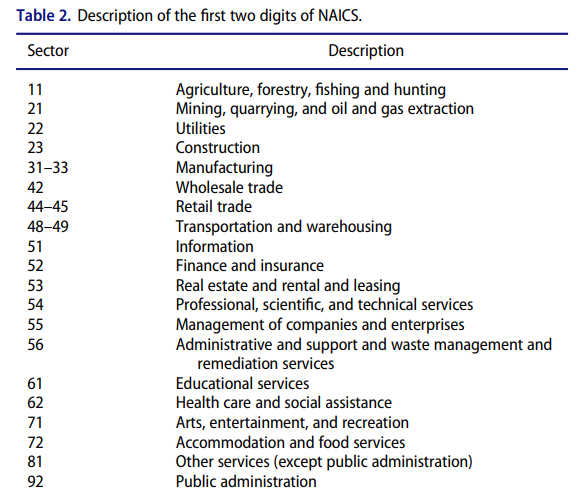

Defining a function that extracts the first two digit of the NAICS and matches it to its corresponding sector, it also assigns 
observation with "0" for NAICS code as "Unspecified"  

In [50]:
def sector(ds):
    if ds==0:
        return "Unspecified"
    ds = str(ds)
    x = ds[0:2]
    x = int(x)
    if x == 11:
        return "Agriculture, forestry, fishing and hunting"
    elif x == 21:
        return "Mining, quarrying, and oil and gas extraction"
    elif x== 22:
        return "Utilities"
    elif x>=31 and x<=33:
        return "Manufacturing"
    elif x==23:
        return "Construction"
    elif x==42:
        return "Wholesale trade"
    elif x== 44 or x==45:
        return "Retail trade"
    elif x== 48 or x==49:
        return "Transportation and warehousing"
    elif x==51:
        return "Information"
    elif x==52:
        return "Finance and insurance"
    elif x==53:
        return "Real estate and rental and leasing"
    elif x==54:
        return "Professional, scientific, and technical services"
    elif x==55:
        return "Management of companies and enterprises"
    elif x==56:
        return "Administrative and support and waste management and remediation services"
    elif x==61:
        return "Educational services"
    elif x==62:
        return "Health care and social assistance"
    elif x==71:
        return "Arts, entertainment, and recreation"
    elif x==72:
        return "Accommodation and food services"
    elif x==92:
        return "Public administration"
    elif x==81:
        return "Other services"
    

In [51]:
# Creating a new column that specifies the economic sector of each record
datas["Sector"]= datas.NAICS.apply(sector)

## DETERMING IF A RECORD FROM A FRANCHISE OR NOT

In [52]:
# 0 and 1 implies its a not a franchise, using ) to represent a non-franchise for uniformity
datas.FranchiseCode.replace({1:0}, inplace = True)

# defining a fynction the determines if a record is franchise or not
def franchise(ds):
    if ds == 0:
        return "N"
    else: 
        return "Y"
    
# Creating a column that specifies if an observation is a franchise or not
datas["Franchise_or_not"] = datas.FranchiseCode.apply(franchise)

In [53]:
datas.head()

,State,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Sector,Franchise_or_not
0,IN,451120,84,4,2.0,0,0,0,0,N,Y,60000.0,0.0,P I F,0.0,60000.0,48000.0,Retail trade,N
1,IN,722410,60,2,2.0,0,0,0,0,N,Y,40000.0,0.0,P I F,0.0,40000.0,32000.0,Accommodation and food services,N
2,IN,621210,180,7,1.0,0,0,0,0,N,N,287000.0,0.0,P I F,0.0,287000.0,215250.0,Health care and social assistance,N
3,OK,0,60,2,1.0,0,0,0,0,N,Y,35000.0,0.0,P I F,0.0,35000.0,28000.0,Unspecified,N
4,FL,0,240,14,1.0,7,7,0,0,N,N,229000.0,0.0,P I F,0.0,229000.0,229000.0,Unspecified,N


## DROPPING RECORD THAT HAVE MISSING VALUES FOR THE STATUS

In [54]:
datas.dropna(subset=["MIS_Status"], inplace = True)

Defining a function that plots a bar chart of the number of loan request for a category and aslo plots a bar chart 
for the number of loan requests that were paid in full and were defaulted for a category 

In [55]:
def status_plot(category):    
    fig, ax1 =plt.subplots()
    fig, ax2 =plt.subplots()

    datas.groupby(category).agg({"MIS_Status":"count"}).rename({"MIS_Status":"Number of loan requests"}, 
                                                                    axis="columns").sort_values( "Number of loan requests", 
                                                                    ascending=False).plot(kind="bar", figsize= (12,6), ax = ax1)

    datas[datas["MIS_Status"] == 'P I F'].groupby(category).agg({"MIS_Status":"count"}).rename({"MIS_Status":"Paid in Full"}, 
                                                                                              axis="columns").sort_values(
                                                                                              "Paid in Full", 
                                                                                              ascending=False).plot(kind="bar", 
                                                                                              figsize= (12,6), ax = ax2, 
                                                                                              color="g", label="Paid")


    datas[datas["MIS_Status"] == 'CHGOFF'].groupby(category).agg({"MIS_Status":"count"}).rename({"MIS_Status":"Defaulted"}, 
                                                                                               axis="columns").sort_values(
                                                                                              "Defaulted", 
                                                                                              ascending=False).plot(kind="bar", 
                                                                                               figsize= (12,6), ax = ax2, 
                                                                                               color="r", label="default")
    plt.legend()
    plt.show()

Defining a function that plots a scatterplot of the number of loan request for a category and aslo plots a scatter plot 
for the number of loan requests that were paid in full and were defaulted for a category 

In [58]:
def status_plot2(category):    
    fig, ax1 =plt.subplots()
    fig, ax2 =plt.subplots()

    datas.groupby(category).agg({"MIS_Status":"count"}).rename({"MIS_Status":"Number of loan requests"}, 
                                                        axis="columns").sort_values( "Number of loan requests", 
                                                        ascending=False).reset_index().plot(x=category, 
                                                        y="Number of loan requests", kind="scatter", figsize= (12,6), ax = ax1)

    datas[datas["MIS_Status"] == 'P I F'].groupby(category).agg({"MIS_Status":"count"}).rename({"MIS_Status":"Paid in Full"}, 
                                                                  axis="columns").sort_values(
                                                                  "Paid in Full", 
                                                                  ascending=False).reset_index().plot(x=category, 
                                                                    y="Paid in Full",kind="scatter", 
                                                                  figsize= (12,6), ax = ax2, 
                                                                  color="g", label="Paid")


    datas[datas["MIS_Status"] == 'CHGOFF'].groupby(category).agg({"MIS_Status":"count"}).rename({"MIS_Status":"Defaulted"}, 
                                                                   axis="columns").sort_values(
                                                                  "Defaulted", 
                                                                  ascending=False).reset_index().plot(x=category, 
                                                                    y="Defaulted",kind="scatter", 
                                                                   figsize= (12,6), ax = ax2, 
                                                                   color="r", label="default")
    plt.legend()
    plt.show()

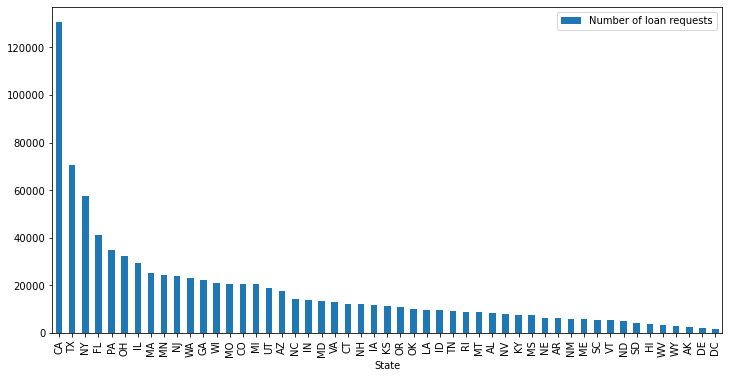

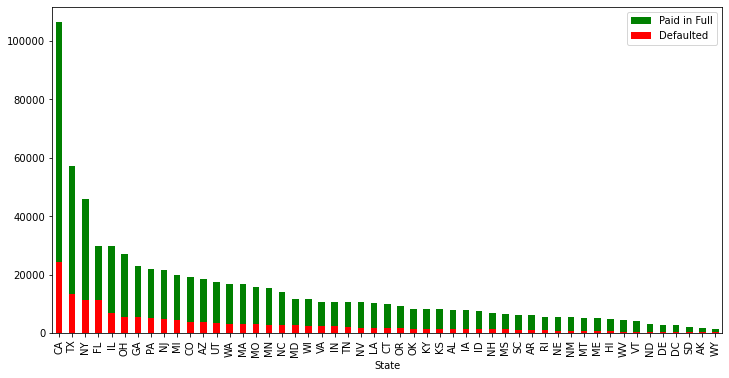

In [59]:
status_plot("State")

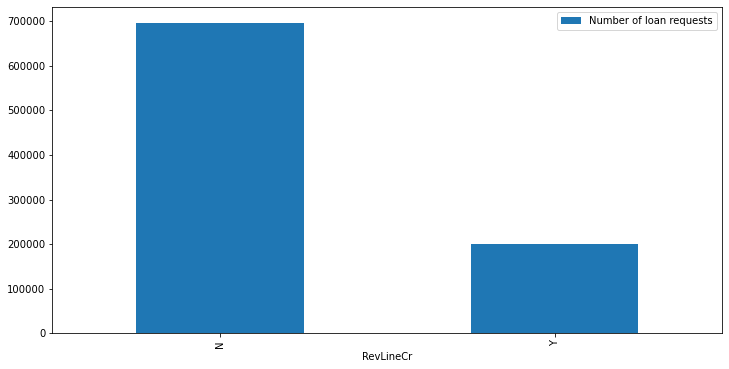

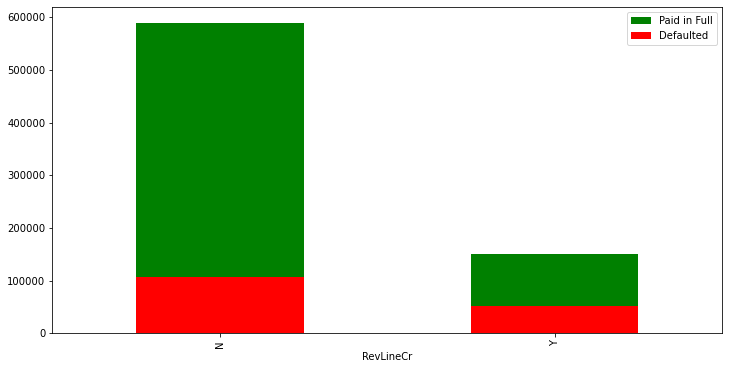

In [60]:
status_plot("RevLineCr")

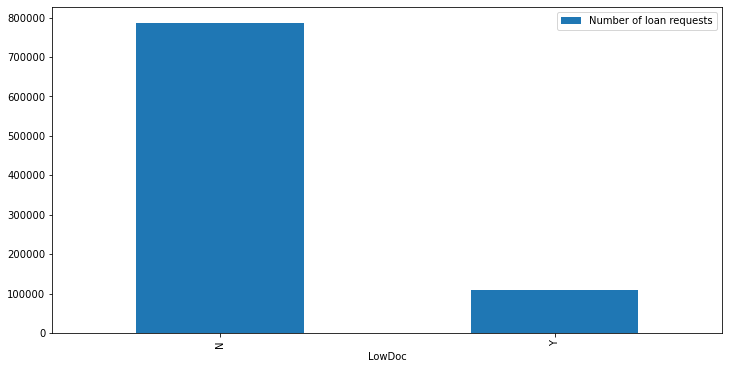

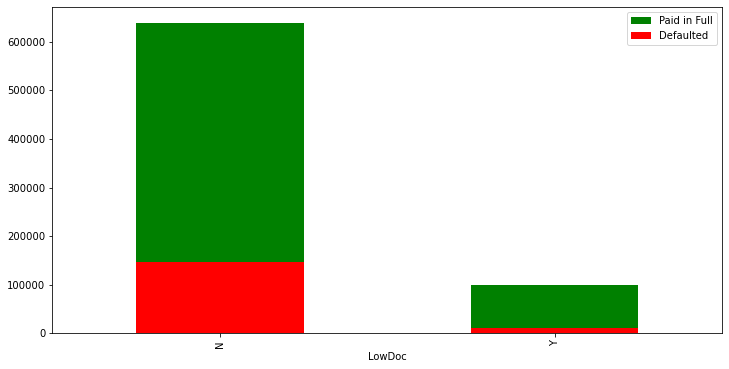

In [61]:
status_plot("LowDoc")

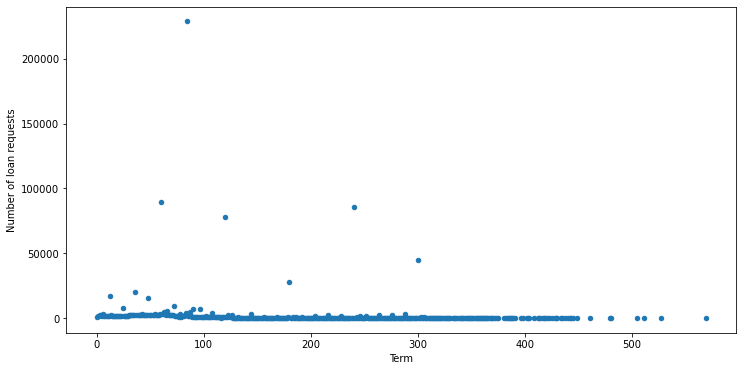

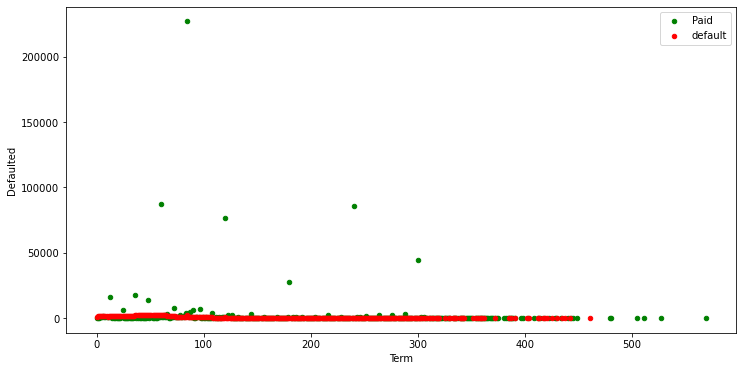

In [62]:
status_plot2("Term")

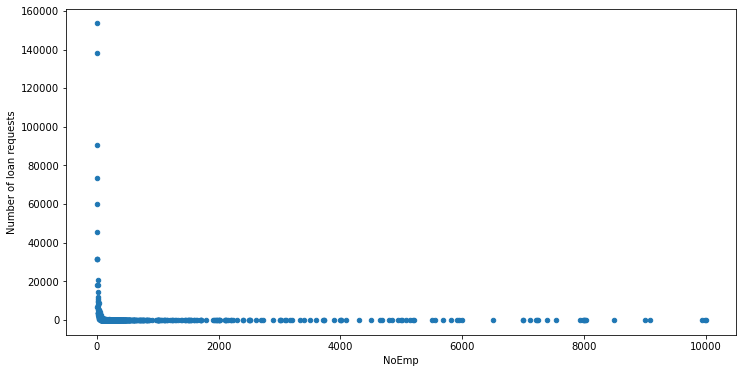

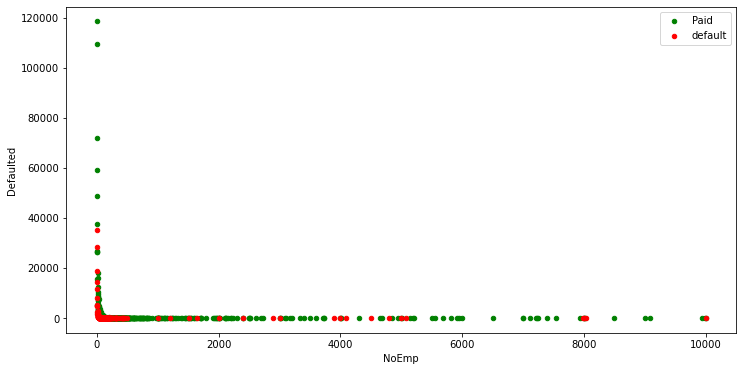

In [63]:
status_plot2("NoEmp")

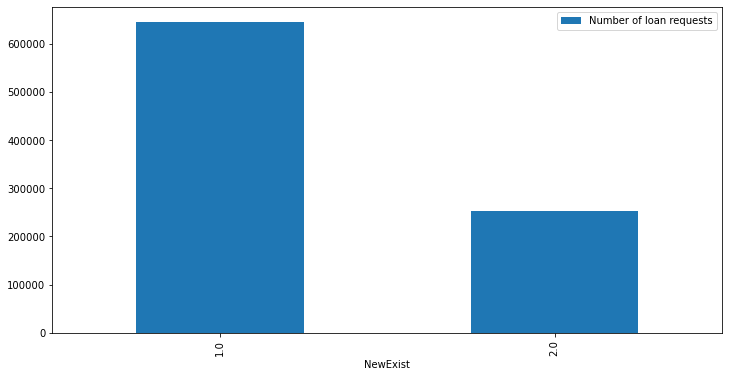

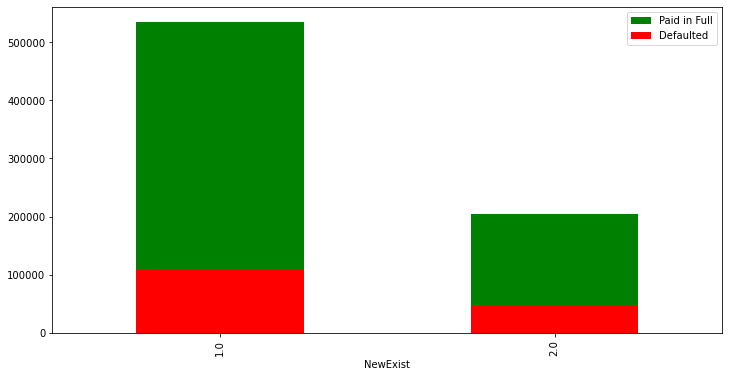

In [64]:
status_plot("NewExist")

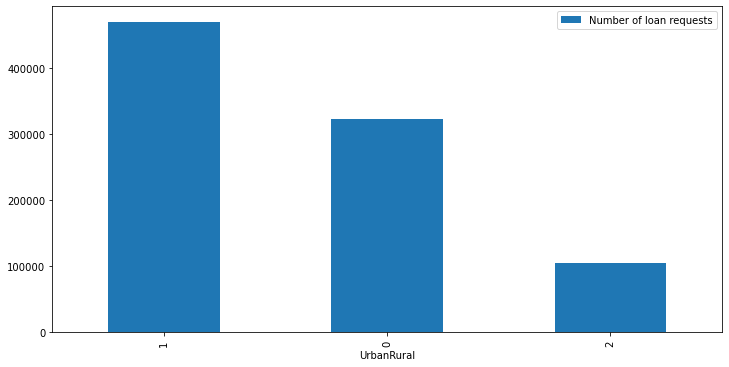

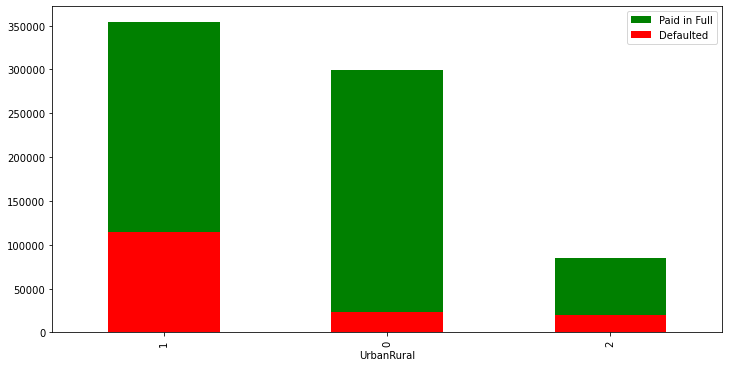

In [65]:
status_plot("UrbanRural")

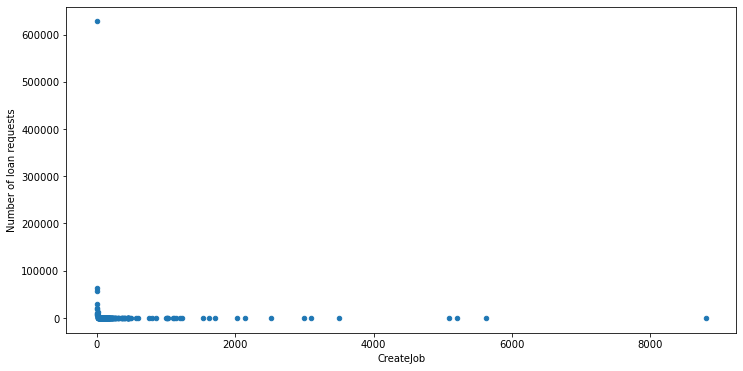

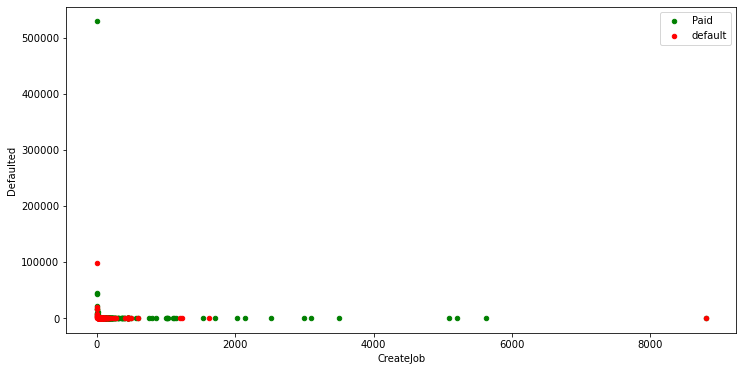

In [66]:
status_plot2("CreateJob")

In [67]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897167 entries, 0 to 899163
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   State              897167 non-null  object 
 1   NAICS              897167 non-null  int64  
 2   Term               897167 non-null  int64  
 3   NoEmp              897167 non-null  int64  
 4   NewExist           897167 non-null  float64
 5   CreateJob          897167 non-null  int64  
 6   RetainedJob        897167 non-null  int64  
 7   FranchiseCode      897167 non-null  int64  
 8   UrbanRural         897167 non-null  int64  
 9   RevLineCr          897167 non-null  object 
 10  LowDoc             897167 non-null  object 
 11  DisbursementGross  897167 non-null  float64
 12  BalanceGross       897167 non-null  float64
 13  MIS_Status         897167 non-null  object 
 14  ChgOffPrinGr       897167 non-null  float64
 15  GrAppv             897167 non-null  float64
 16  SB

# Data visualization

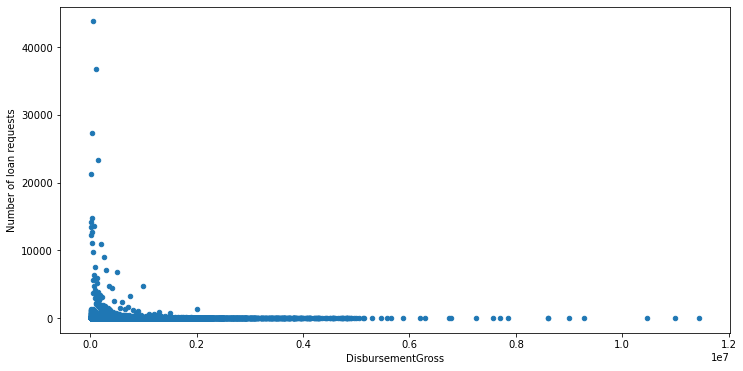

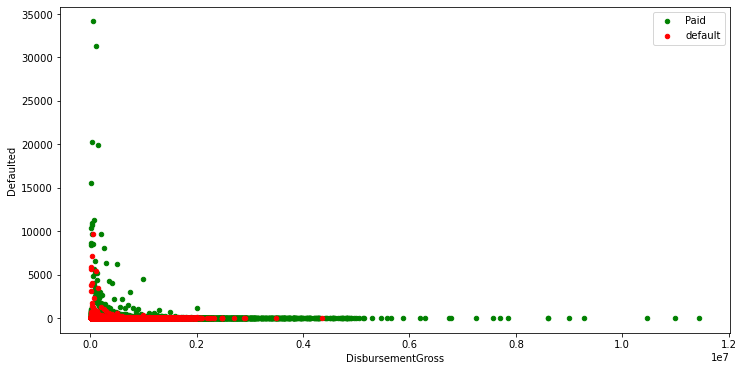

In [69]:
status_plot2("DisbursementGross")

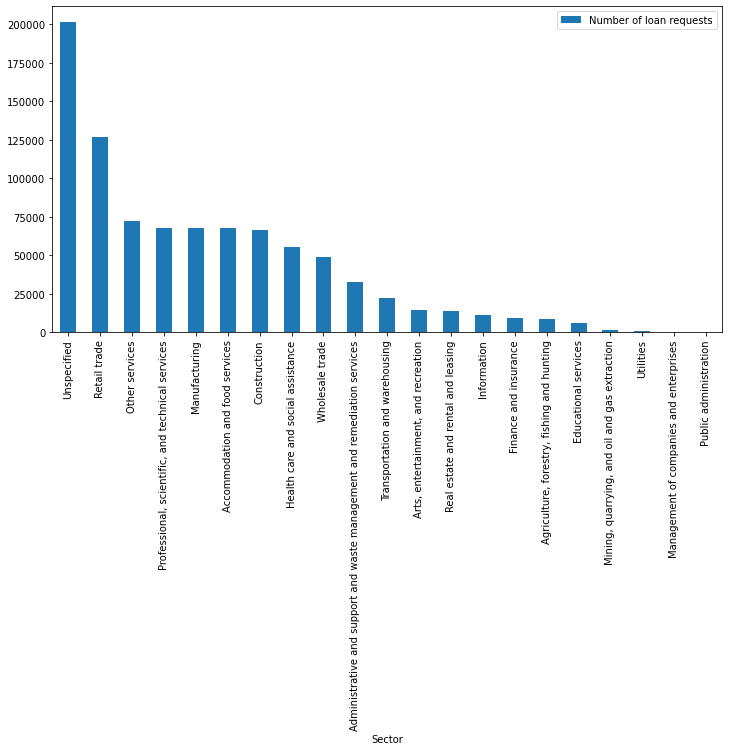

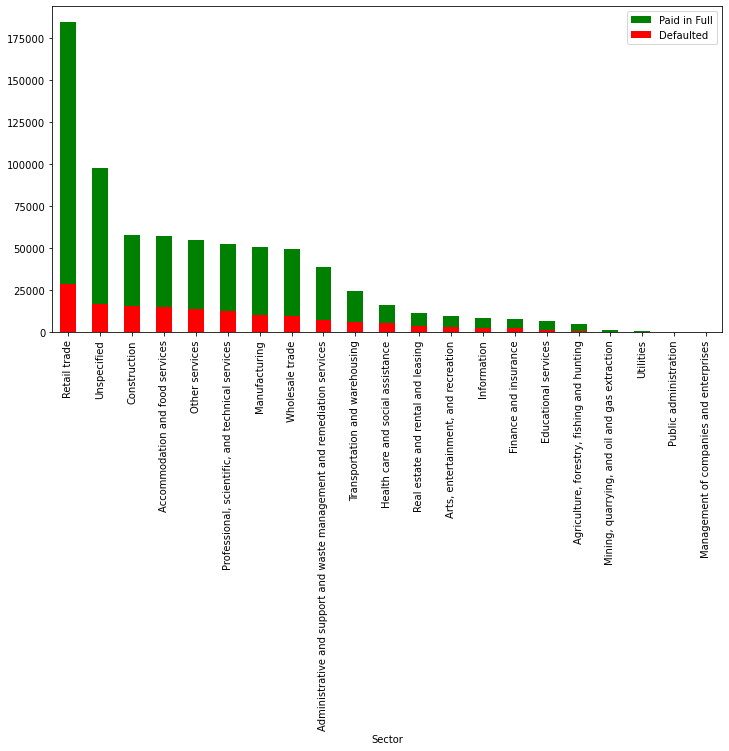

In [70]:
status_plot("Sector")

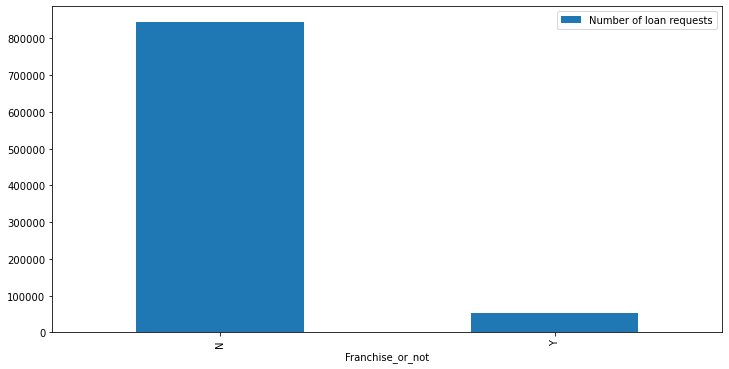

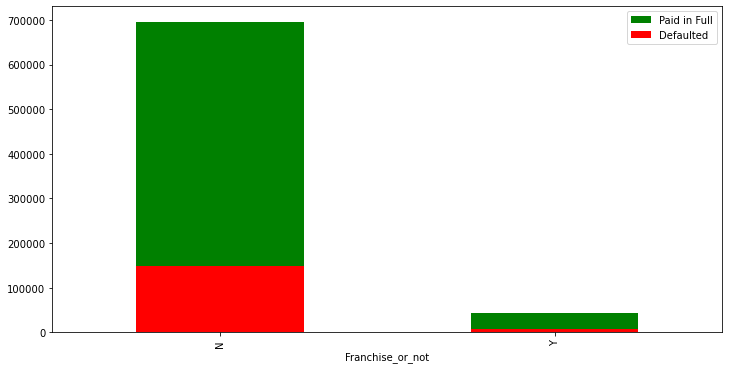

In [71]:
status_plot("Franchise_or_not")

# PRE-PROCESSING:  FEATURE SELECTION AND EXTRACTION


In [72]:
# ATTRIBUTES TO DROP
columns_to_drop2 = ["NAICS","FranchiseCode", "BalanceGross", "ChgOffPrinGr", "GrAppv", "SBA_Appv", "DisbursementGross"]

# DROPPING UNWANTED ATTRIBUTES
datas.drop(columns_to_drop2, axis="columns", inplace = True)

In [73]:
datas.head()

,State,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,MIS_Status,Sector,Franchise_or_not
0,IN,84,4,2.0,0,0,0,N,Y,P I F,Retail trade,N
1,IN,60,2,2.0,0,0,0,N,Y,P I F,Accommodation and food services,N
2,IN,180,7,1.0,0,0,0,N,N,P I F,Health care and social assistance,N
3,OK,60,2,1.0,0,0,0,N,Y,P I F,Unspecified,N
4,FL,240,14,1.0,7,7,0,N,N,P I F,Unspecified,N


## FEATURES SELECTION


In [74]:
Y = datas["MIS_Status"].values
X = datas.drop("MIS_Status", axis="columns").values

In [75]:
X[0:5]

array([['IN', 84, 4, 2.0, 0, 0, 0, 'N', 'Y', 'Retail trade', 'N'],
       ['IN', 60, 2, 2.0, 0, 0, 0, 'N', 'Y',
        'Accommodation and food services', 'N'],
       ['IN', 180, 7, 1.0, 0, 0, 0, 'N', 'N',
        'Health care and social assistance', 'N'],
       ['OK', 60, 2, 1.0, 0, 0, 0, 'N', 'Y', 'Unspecified', 'N'],
       ['FL', 240, 14, 1.0, 7, 7, 0, 'N', 'N', 'Unspecified', 'N']],
      dtype=object)

## Convert Categorical features to numerical values

In [76]:
# SAVING THE SECTORS TO A LIST
sectors = list(datas.Sector.unique())

In [77]:
le_State = preprocessing.LabelEncoder()
le_State.fit(states)
X[:,0] = le_State.transform(X[:,0]) 


le_RevLineCr = preprocessing.LabelEncoder()
le_RevLineCr.fit(['N', 'Y'])
X[:,7] = le_RevLineCr.transform(X[:,7])


le_LowDoc = preprocessing.LabelEncoder()
le_LowDoc.fit(['Y', 'N'])
X[:,8] = le_LowDoc.transform(X[:,8])

le_Sector = preprocessing.LabelEncoder()
le_Sector.fit(sectors)
X[:,9] = le_Sector.transform(X[:,9])

le_Franchise_or_not = preprocessing.LabelEncoder()
le_Franchise_or_not.fit(['N', 'Y'])
X[:,10] = le_Franchise_or_not.transform(X[:,10])



X[0:5]



array([[15, 84, 4, 2.0, 0, 0, 0, 0, 1, 16, 0],
       [15, 60, 2, 2.0, 0, 0, 0, 0, 1, 0, 0],
       [15, 180, 7, 1.0, 0, 0, 0, 0, 0, 7, 0],
       [36, 60, 2, 1.0, 0, 0, 0, 0, 1, 18, 0],
       [9, 240, 14, 1.0, 7, 7, 0, 0, 0, 18, 0]], dtype=object)

What are our lables?

In [78]:
Y[0:5]

array(['P I F', 'P I F', 'P I F', 'P I F', 'P I F'], dtype=object)

what are our features?

In [79]:
X[:5]

array([[15, 84, 4, 2.0, 0, 0, 0, 0, 1, 16, 0],
       [15, 60, 2, 2.0, 0, 0, 0, 0, 1, 0, 0],
       [15, 180, 7, 1.0, 0, 0, 0, 0, 0, 7, 0],
       [36, 60, 2, 1.0, 0, 0, 0, 0, 1, 18, 0],
       [9, 240, 14, 1.0, 7, 7, 0, 0, 0, 18, 0]], dtype=object)

## NORMALIZE DATA

In [80]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.5790518 , -0.34028281, -0.10044975,  1.597594  , -0.03563748,
        -0.04552702, -1.17127107, -0.5367842 ,  2.67270096,  0.66104116,
        -0.24736572],
       [-0.5790518 , -0.64446217, -0.12755232,  1.597594  , -0.03563748,
        -0.04552702, -1.17127107, -0.5367842 ,  2.67270096, -1.87696775,
        -0.24736572],
       [-0.5790518 ,  0.87643461, -0.05979589, -0.62594126, -0.03563748,
        -0.04552702, -1.17127107, -0.5367842 , -0.37415334, -0.76658885,
        -0.24736572],
       [ 0.80939187, -0.64446217, -0.12755232, -0.62594126, -0.03563748,
        -0.04552702, -1.17127107, -0.5367842 ,  2.67270096,  0.97829227,
        -0.24736572],
       [-0.97574999,  1.636883  ,  0.03506311, -0.62594126, -0.0060954 ,
        -0.01603872, -1.17127107, -0.5367842 , -0.37415334,  0.97829227,
        -0.24736572]])

## SPLITTING THE DATA INTO TEST AND TRAIN 

In [81]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (717733, 11) (717733,)
Test set: (179434, 11) (179434,)


## CLASSIFICATION USING LOGISTIC REGRESSION

In [90]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [91]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression(parameters)
logreg_cv= GridSearchCV(lr,parameters,cv=10)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(penalty={'C': [0.01, 0.1, 1],
                                                   'penalty': ['l2'],
                                                   'solver': ['lbfgs']}),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [92]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8358790808899885


In [93]:
logreg_cv.score(X_test,y_test)

0.8349086572221541

In [94]:
yhat = logreg_cv.predict(X_test)
yhat_prob = logreg_cv.predict_proba(X_test)

In [95]:
yhat[:5]

array(['P I F', 'P I F', 'P I F', 'P I F', 'P I F'], dtype=object)

In [96]:
yhat_prob[:5]

array([[0.1857697 , 0.8142303 ],
       [0.42190675, 0.57809325],
       [0.12570394, 0.87429606],
       [0.10333306, 0.89666694],
       [0.45449759, 0.54550241]])

## MODEL EVALUATION

In [97]:
jaccard_score(y_test, yhat,pos_label='P I F')

0.8296059821685361

In [98]:
f1_score(y_test, yhat, average='weighted') 

0.7953449653114262

In [99]:
log_loss(y_test, yhat_prob)

0.3733751909087305

### USING SVM

In [100]:
from sklearn import svm

In [101]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [102]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [ ]:
svm_cv= GridSearchCV(svm,parameters,cv=10)
svm_cv.fit(X_train,y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

In [ ]:
#clf = svm.SVC(kernel='rbf')
#clf.fit(X_train, y_train) 

In [ ]:
#yhat = clf.predict(X_test)
#yhat [0:5]

#from sklearn.metrics import f1_score
#f1_score(y_test, yhat, average='weighted') 